In [1]:
import pandas as pd 
from sklearn_extra.cluster import KMedoids
df = pd.read_csv("../../data/distance_matrix.csv")

In [7]:
str_process = "/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/304_4g3j_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/0_3abb_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/475_1ebe_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/131_3abb_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/169_1apx_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/213_3abb_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/546_1ebe_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/523_1ebe_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/0_4g3j_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/333_4g3j_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/431_1apx_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/83_3abb_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/547_1u5u_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/477_1apx_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/580_3abb_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/97_4g3j_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/589_1u5u_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/60_3abb_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/33_1u5u_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/386_1u5u_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/269_3abb_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/564_1hch_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/34_1hch_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/269_4g3j_movie,/ocean/projects/che160019p/santi92/cpet_proteins_full_hemes//compressed/145_1hch_movie"
list_raw = str_process.split(",")
list_names = [x.split("/")[-1] for x in list_raw]
list_final = []
for i in list_names:
    list_final.append(i.split("_")[0]+ "_" + i.split("_")[1])
print(list_final)


['304_4g3j', '0_3abb', '475_1ebe', '131_3abb', '169_1apx', '213_3abb', '546_1ebe', '523_1ebe', '0_4g3j', '333_4g3j', '431_1apx', '83_3abb', '547_1u5u', '477_1apx', '580_3abb', '97_4g3j', '589_1u5u', '60_3abb', '33_1u5u', '386_1u5u', '269_3abb', '564_1hch', '34_1hch', '269_4g3j', '145_1hch']


In [8]:
# rename all files in folder with _ before compressed
target_folder = "../../data/md_traj/"
import os
for filename in os.listdir(target_folder):
    if filename.endswith("compressed.json"):
        os.rename(target_folder+filename, target_folder+filename.split("compressed")[0] + "_compressed.json")
        

In [2]:
kmedoids = KMedoids(n_clusters=8, random_state=0).fit(df.to_numpy())

In [3]:
kmedoids.cluster_centers_ # use this to get center point of 

array([[0.3672454 , 0.48911968, 0.39720221, ..., 0.61171425, 0.38780669,
        0.32752703],
       [0.3559211 , 0.22800262, 0.71921385, ..., 0.18560684, 0.68494874,
        0.58793369],
       [0.50417035, 0.68891832, 0.35545772, ..., 0.82572811, 0.36869688,
        0.35925779],
       ...,
       [0.55318636, 0.7290194 , 0.38185465, ..., 0.8322174 , 0.38003144,
        0.43138478],
       [0.48250227, 0.64000404, 0.36284149, ..., 0.77567669, 0.36656503,
        0.37020488],
       [0.41642951, 0.57502277, 0.38142054, ..., 0.73366195, 0.39416129,
        0.33271664]])

In [18]:
df = pd.read_csv("../../data/distance_matrix_0930.csv")
df
df["Unnamed: 0"]
df = df.drop(["Unnamed: 0"], axis=1)
df = df.drop(["Unnamed: 0.1"], axis=1)
df.to_csv("../../data/distance_matrix_0930.csv", index=False)

In [3]:
df = pd.read_csv("../../data/distance_matrix_0930.csv")


In [14]:
df_activity = pd.read_csv("../../data/protein_data.csv")
names = df_activity["name"].tolist()


['1a4e',
 '1apx',
 '1bgp',
 '1dgh',
 '1dz9',
 '1ebe',
 '1gvh',
 '1gwf',
 '1gwh',
 '1hch',
 '1iyn',
 '1jio',
 '1lga',
 '1ly9',
 '1m7s',
 '1mjt',
 '1mqf',
 '1n6b',
 '1p3v',
 '1pa2',
 '1qgj',
 '1qpa',
 '1si8',
 '1sj2',
 '1sy7',
 '1u5u',
 '1ued',
 '1ulw',
 '1v8x',
 '1wox',
 '2a9e',
 '2d09',
 '2e39',
 '2hi4',
 '2iqf',
 '2j2m',
 '2nnj',
 '2ve3',
 '2vxh',
 '2w0a',
 '2wh8',
 '2wm4',
 '2x5l',
 '2xkr',
 '2yp1',
 '2z3t',
 '2zdo',
 '2zqx',
 '3aba',
 '3abb',
 '3atj',
 '3b4x',
 '3bk9',
 '3cv8',
 '3czh',
 '3czy',
 '3e65',
 '3gas',
 '3hb6',
 '3hdl',
 '3lgm',
 '3m8m',
 '3mdr',
 '3mgx',
 '3mvr',
 '3n9y',
 '3nn1',
 '3ozv',
 '3qpi',
 '3r9b',
 '3re8',
 '3riv',
 '3rke',
 '3rqo',
 '3rwl',
 '3s4f',
 '3t3q',
 '3t3z',
 '3ut2',
 '3uw8',
 '3v8d',
 '3vm4',
 '3vxi',
 '3wrh',
 '3wsp',
 '3wxo',
 '3zj5',
 '3zkp',
 '4a5g',
 '4au9',
 '4aul',
 '4b2y',
 '4b7f',
 '4ccp',
 '4coh',
 '4cuo',
 '4d1o',
 '4d3t',
 '4d6z',
 '4dnj',
 '4e2p',
 '4eji',
 '4ep6',
 '4g2c',
 '4g3j',
 '4g7t',
 '4ggv',
 '4gqe',
 '4grc',
 '4gs1',
 '4gt2',
 

In [24]:
rows_keep = []
for i in names: 
    rows_keep.append(df.columns.get_loc(i))

df[names].iloc[rows_keep]
df[names].iloc[rows_keep].to_csv("../../data/distance_matrix_0930_filtered.csv", index=False)

In [1]:
import pandas as pd
activity = pd.read_csv("../../data/protein_data.csv")
names = activity["name"]
selectivity = activity["label"].tolist()

In [3]:
list(set(selectivity))

['H', 'Y', 'C']

In [1]:
import networkx as nx 
import numpy as np
import pandas as pd


import os

folder = "../../data/communities/"
dist_mat = "../../data/communities/md_cys.csv"
cutoff = 7.5
#dist_matrix = np.genfromtxt(dist_mat, delimiter=',', skip_header=1).to_numpy()
dist_matrix = pd.read_csv(dist_mat, index_col=0).to_numpy()
names = np.genfromtxt(dist_mat, delimiter=',', dtype=str, max_rows=1)
#print(dist_matrix.columns)

std = np.std(dist_matrix.flatten())
dist_matrix = (dist_matrix) / std
dist_mask = np.where(dist_matrix > cutoff, 0, dist_matrix)
G = nx.from_numpy_array(dist_mask)


In [24]:
from glob import glob
import json 
import pandas as pd
import numpy as np

counts = []
cutoff = 7.5
root = "../../data/communities/"
dist_mat = root + "md_cys.csv"
name_file = root + "topo_file_list.txt"
compressed_dictionaries = glob(root + "*compressed.json")
# get all files with compressed in them 

dist_matrix = pd.read_csv(dist_mat, index_col=0).to_numpy()
names = np.genfromtxt(name_file, dtype=str)

names_stripped = [i.split("/")[-1] for i in list(names)]
index_stripped = [i.split("_")[1] for i in names_stripped]
protein_names = [i.split("_")[3] for i in names_stripped]


for ind, i in enumerate(protein_names):
    with open(root + i + "compressed.json", "r") as f:
        compressed_dict = json.load(f)
    for k, v in compressed_dict.items():
        index_center = v["index_center"]
        ind_center = int(v["name_center"].split("/")[-1].split("_")[1])
        if(ind_center == int(index_stripped[ind])):
            count_temp = v["count"]    
            counts.append(count_temp)
            break
    else: 
        print("warning!, no match for ", i)

            

In [9]:
import matplotlib.pyplot as plt

dist_matrix = pd.read_csv(dist_mat).to_numpy()
std = np.std(dist_matrix)
dist_matrix = (dist_matrix) / std
plt.hist(dist_matrix.flatten(), bins=100)

NameError: name 'pd' is not defined

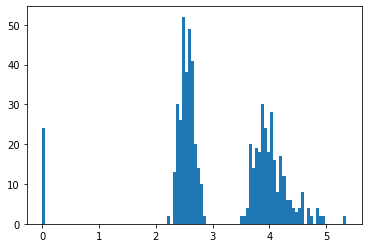

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

dist_matrix = pd.read_csv("../../data/md_traj_hemes/distance_matrix.csv", index_col=0).to_numpy()
std = np.std(dist_matrix)
dist_matrix = (dist_matrix) / std
plt.hist(dist_matrix.flatten(), bins=100)
plt.show()

In [2]:
spring_3D = nx.spring_layout(G,dim=3, seed = 1)
#print(spring_3D)
x_nodes = [spring_3D[i][0] for i in G]# x-coordinates of nodes
y_nodes = [spring_3D[i][1] for i in G]# y-coordinates
z_nodes = [spring_3D[i][2] for i in G]# z-coordinates
edge_list = G.edges()


x_edges=[]
y_edges=[]
z_edges=[]

#need to fill these with all of the coordiates
for edge in edge_list:
    #format: [beginning,ending,None]
    x_coords = [spring_3D[edge[0]][0],spring_3D[edge[1]][0],None]
    x_edges += x_coords

    y_coords = [spring_3D[edge[0]][1],spring_3D[edge[1]][1],None]
    y_edges += y_coords

    z_coords = [spring_3D[edge[0]][2],spring_3D[edge[1]][2],None]
    z_edges += z_coords

In [3]:
import plotly.graph_objects as go

#create a trace for the edges
trace_edges = go.Scatter3d(x=x_edges,
                        y=y_edges,
                        z=z_edges,
                        mode='lines',
                        line=dict(color='black', width=0.3),
                        hoverinfo='none')

#create a trace for the nodes
#color=community_label,text=club_labels,
trace_nodes = go.Scatter3d(x=x_nodes,
                         y=y_nodes,
                        z=z_nodes,
                        mode='markers',
                        marker=dict(symbol='circle',
                                    size=6,
                                    colorscale='spectral',
                       line=dict(color='black', width=0.2)),
                        text=names)

#we need to set the axis for the plot 
axis = dict(showbackground=False,
            showline=False,
            zeroline=False,
            showgrid=True,
            showticklabels=False,
            title='')


#also need to create the layout for our plot
layout = go.Layout(title="Network, Cutoff = " + str(cutoff),
                width=1000,
                height=1000,
                showlegend=False,
                scene=dict(xaxis=dict(axis),
                        yaxis=dict(axis),
                        zaxis=dict(axis),
                        ),
                margin=dict(t=100),
                hovermode='closest')

#Include the traces we want to plot and create a figure
data = [trace_edges, trace_nodes]
fig = go.Figure(data=data, layout=layout)

fig.show()
import plotly.io as pio
#pio.write_html(fig, auto_open=True, file = str(cutoff)+"_traj.html")
